In [ ]:
pip install sodapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Importing the Dataset using API

In [ ]:
client = Socrata("data.cityofnewyork.us", None)

In [ ]:
results = client.get("4dx7-axux", limit=2000)

In [ ]:
results_df = pd.DataFrame.from_records(results)

# Cleaning and Exploring the Dataset 

In [ ]:
results_df.head()

,borough,restaurantname,seatingchoice,legalbusinessname,businessaddress,restaurantinspectionid,isroadwaycompliant,inspectedon,agencycode,postcode,latitude,longitude,communityboard,councildistrict,censustract,bin,bbl,nta,skippedreason
0,Manhattan,Oscar Wilde,both,Camelot Castle LLC,45 West 27th st,72891,Non-Compliant,2021-12-20T16:06:58.000,DOT,10001,40.744876,-73.989657,5,3,58,1015677,1008290011,Hudson Yards-Chelsea-Flatiron-Union Square,NaN
1,Manhattan,LA RUBIA RESTAURANT,both,LA RUBIA RESTAURANT INC,3517 BROADWAY,72892,For HIQA Review,2021-12-20T16:18:42.000,DOT,10031,40.825863,-73.950874,9,7,229,1062369,1020910032,Hamilton Heights,NaN
2,Manhattan,Thai Sliders,sidewalk,Silom Thai Inc,150 8th Ave,72893,Non-Compliant,2021-12-20T16:35:41.000,DOT,10011,40.741906,-74.000945,4,3,81,1013845,1007670002,Hudson Yards-Chelsea-Flatiron-Union Square,NaN
3,Brooklyn,Otway,both,St james 930 LLC,930 Fulton street,72894,Cease and Desist,2021-12-20T16:38:45.000,DOT,11238,40.682833,-73.963833,2,35,201,3335112,3020130038,Clinton Hill,NaN
4,Brooklyn,WILLIAMSBURG THAI CUISINE,both,WILLIAMSBURG THAI CUISINE NY INC,212 BEDFORD AVENUE,72896,Compliant,2021-12-20T16:52:41.000,DOT,11249,40.716913,-73.958728,1,33,553,3062192,3023350026,North Side-South Side,NaN


In [ ]:
results_df["isroadwaycompliant"].unique()

array(['Non-Compliant', 'For HIQA Review', 'Cease and Desist',
       'Compliant', 'Suspended and Deactivated', 'Under Review',
       'Skipped Inspection', 'Marked For Removal', 'Pre-Suspension',
       'Pre-Removal', 'Removed and Deactivated'], dtype=object)

In [ ]:
results_df["agencycode"].unique()

array(['DOT', nan, 'DEP', 'DCAS', 'DOB'], dtype=object)

In [ ]:
#Step 1: Changing the column names 
results_df.rename(columns={'restaurantname': 'Restaurant_Name', 'legalbusinessname': 'Legal_Business_Name', 'isroadwaycompliant': 'Is_Roadway_Compliant', 'borough': 'Borough', 'restaurantname': 'Restaurant_Name', 'seatingchoice': 'Seating_Choice', 'businessaddress': 'Business_Address', 'restaurantinspectionid': 'Restaurant_Inspection_Id', 'inspectedon': 'Inspected_On', 'agencycode': 'Agency_Code', 'postcode': 'Post_Code', 'latitude': 'Latitude', 'longitude': 'Longitude', 'communityboard': 'Community_Board', 'councildistrict': 'Council_District'},inplace=True) 
results_df.head()

,Borough,Restaurant_Name,Seating_Choice,Legal_Business_Name,Business_Address,Restaurant_Inspection_Id,Is_Roadway_Compliant,Inspected_On,Agency_Code,Post_Code,Latitude,Longitude,Community_Board,Council_District,censustract,bin,bbl,nta,skippedreason
0,Manhattan,Oscar Wilde,both,Camelot Castle LLC,45 West 27th st,72891,Non-Compliant,2021-12-20T16:06:58.000,DOT,10001,40.744876,-73.989657,5,3,58,1015677,1008290011,Hudson Yards-Chelsea-Flatiron-Union Square,NaN
1,Manhattan,LA RUBIA RESTAURANT,both,LA RUBIA RESTAURANT INC,3517 BROADWAY,72892,For HIQA Review,2021-12-20T16:18:42.000,DOT,10031,40.825863,-73.950874,9,7,229,1062369,1020910032,Hamilton Heights,NaN
2,Manhattan,Thai Sliders,sidewalk,Silom Thai Inc,150 8th Ave,72893,Non-Compliant,2021-12-20T16:35:41.000,DOT,10011,40.741906,-74.000945,4,3,81,1013845,1007670002,Hudson Yards-Chelsea-Flatiron-Union Square,NaN
3,Brooklyn,Otway,both,St james 930 LLC,930 Fulton street,72894,Cease and Desist,2021-12-20T16:38:45.000,DOT,11238,40.682833,-73.963833,2,35,201,3335112,3020130038,Clinton Hill,NaN
4,Brooklyn,WILLIAMSBURG THAI CUISINE,both,WILLIAMSBURG THAI CUISINE NY INC,212 BEDFORD AVENUE,72896,Compliant,2021-12-20T16:52:41.000,DOT,11249,40.716913,-73.958728,1,33,553,3062192,3023350026,North Side-South Side,NaN


In [ ]:
#Step 2: Checking the shape of the dataset
print("Shape of dataset")
print("Open Restaurant Inspections Dataset:{}".format(results_df))

Shape of dataset
Open Restaurant Inspections Dataset:        Borough            Restaurant_Name Seating_Choice  \
0     Manhattan                Oscar Wilde           both   
1     Manhattan        LA RUBIA RESTAURANT           both   
2     Manhattan               Thai Sliders       sidewalk   
3      Brooklyn                      Otway           both   
4      Brooklyn  WILLIAMSBURG THAI CUISINE           both   
...         ...                        ...            ...   
1995   Brooklyn                 SALVATORES        roadway   
1996  Manhattan                LA VILLETTA           both   
1997     Queens                      Blend           both   
1998     Queens                    Maiella           both   
1999  Manhattan                        ETC       sidewalk   

                   Legal_Business_Name      Business_Address  \
0                   Camelot Castle LLC      45  West 27th st   
1              LA RUBIA RESTAURANT INC         3517 BROADWAY   
2                     

In [ ]:
#Step 3: Summary Statistics of the columns
results_df.describe()

,Borough,Restaurant_Name,Seating_Choice,Legal_Business_Name,Business_Address,Restaurant_Inspection_Id,Is_Roadway_Compliant,Inspected_On,Agency_Code,Post_Code,Latitude,Longitude,Community_Board,Council_District,censustract,bin,bbl,nta,skippedreason
count,2000,2000,2000,2000,2000,2000,2000,2000,1863,2000,1824,1824,1824,1824,1824,1817,1817,1824,310
unique,4,1437,3,1445,1468,2000,11,1869,4,106,1250,1239,17,42,312,1211,1203,88,3
top,Manhattan,AUGUST LAURA,both,Ed's Lobster Bar LLC,94-96 AVENUE A,72891,Non-Compliant,2021-12-21T23:58:48.000,DOT,10019,40.761707,-73.990257,1,3,133,1026567,1010570029,Astoria,No Seating
freq,1092,9,1547,9,9,1,692,9,1858,122,10,10,353,298,47,10,10,159,305


In [ ]:
#Step 4: Checking the data types 
results_df.dtypes

Borough                     object
Restaurant_Name             object
Seating_Choice              object
Legal_Business_Name         object
Business_Address            object
Restaurant_Inspection_Id    object
Is_Roadway_Compliant        object
Inspected_On                object
Agency_Code                 object
Post_Code                   object
Latitude                    object
Longitude                   object
Community_Board             object
Council_District            object
censustract                 object
bin                         object
bbl                         object
nta                         object
skippedreason               object
dtype: object

In [ ]:
#Step 5: Checking the missing or null values
print(results_df.isnull().sum())

#Step 6: Dropping the null values 
# results_df = results_df.dropna()
results_df = results_df.dropna(subset=['Latitude', 'Longitude', 'Community_Board', 'Council_District', 'censustract'])

Borough                        0
Restaurant_Name                0
Seating_Choice                 0
Legal_Business_Name            0
Business_Address               0
Restaurant_Inspection_Id       0
Is_Roadway_Compliant           0
Inspected_On                   0
Agency_Code                  137
Post_Code                      0
Latitude                     176
Longitude                    176
Community_Board              176
Council_District             176
censustract                  176
bin                          183
bbl                          183
nta                          176
skippedreason               1690
dtype: int64


In [ ]:
#Step 7: Changing the data types 
results_df = results_df.astype({'Borough': 'string', 
                                'Restaurant_Name': 'string', 
                                'Seating_Choice': 'string', 
                                'Legal_Business_Name': 'string', 
                                'Business_Address': 'string', 
                                'Restaurant_Inspection_Id': 'int' , 
                                'Is_Roadway_Compliant': 'string',  
                                'Agency_Code': 'string', 
                                'Post_Code': 'int', 
                                'Latitude': 'float', 
                                'Longitude': 'float', 
                                'Community_Board': 'int', 
                                'Council_District': 'float', 
                                'censustract': 'float'})

In [ ]:
results_df

,Borough,Restaurant_Name,Seating_Choice,Legal_Business_Name,Business_Address,Restaurant_Inspection_Id,Is_Roadway_Compliant,Inspected_On,Agency_Code,Post_Code,Latitude,Longitude,Community_Board,Council_District,censustract,bin,bbl,nta,skippedreason
0,Manhattan,Oscar Wilde,both,Camelot Castle LLC,45 West 27th st,72891,Non-Compliant,2021-12-20T16:06:58.000,DOT,10001,40.744876,-73.989657,5,3.0,58.0,1015677,1008290011,Hudson Yards-Chelsea-Flatiron-Union Square,NaN
1,Manhattan,LA RUBIA RESTAURANT,both,LA RUBIA RESTAURANT INC,3517 BROADWAY,72892,For HIQA Review,2021-12-20T16:18:42.000,DOT,10031,40.825863,-73.950874,9,7.0,229.0,1062369,1020910032,Hamilton Heights,NaN
2,Manhattan,Thai Sliders,sidewalk,Silom Thai Inc,150 8th Ave,72893,Non-Compliant,2021-12-20T16:35:41.000,DOT,10011,40.741906,-74.000945,4,3.0,81.0,1013845,1007670002,Hudson Yards-Chelsea-Flatiron-Union Square,NaN
3,Brooklyn,Otway,both,St james 930 LLC,930 Fulton street,72894,Cease and Desist,2021-12-20T16:38:45.000,DOT,11238,40.682833,-73.963833,2,35.0,201.0,3335112,3020130038,Clinton Hill,NaN
4,Brooklyn,WILLIAMSBURG THAI CUISINE,both,WILLIAMSBURG THAI CUISINE NY INC,212 BEDFORD AVENUE,72896,Compliant,2021-12-20T16:52:41.000,DOT,11249,40.716913,-73.958728,1,33.0,553.0,3062192,3023350026,North Side-South Side,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Brooklyn,SALVATORES,roadway,SALVATORE'S PIZZERIA NYC LLC,291 3 AVENUE,75044,Non-Compliant,2022-02-18T13:37:08.000,DOT,11215,40.676956,-73.986405,6,39.0,119.0,3007692,3004540013,Park Slope-Gowanus,NaN
1996,Manhattan,LA VILLETTA,both,JONILU LLC,398 EAST 52 STREET,75045,Cease and Desist,2022-02-18T13:46:58.000,DOT,10022,40.754988,-73.964927,6,4.0,8603.0,1081200,1013630047,Turtle Bay-East Midtown,NaN
1997,Queens,Blend,both,Cullen Partners LLC,47-04 Vernon Blvd,75046,Cease and Desist,2022-02-18T13:49:27.000,DOT,11101,40.745295,-73.953254,2,26.0,7.0,4000085,4000290046,Hunters Point-Sunnyside-West Maspeth,NaN
1998,Queens,Maiella,both,RBT Restaurant LLC,4610 center blvd,75047,Non-Compliant,2022-02-18T13:54:55.000,DOT,11101,40.747056,-73.956403,2,26.0,1.0,4541714,4000210110,Hunters Point-Sunnyside-West Maspeth,NaN


In [ ]:
results

[{'borough': 'Manhattan',
  'restaurantname': 'Oscar Wilde',
  'seatingchoice': 'both',
  'legalbusinessname': 'Camelot Castle LLC',
  'businessaddress': '45  West 27th st',
  'restaurantinspectionid': '72891',
  'isroadwaycompliant': 'Non-Compliant',
  'inspectedon': '2021-12-20T16:06:58.000',
  'agencycode': 'DOT',
  'postcode': '10001',
  'latitude': '40.744876',
  'longitude': '-73.989657',
  'communityboard': '5',
  'councildistrict': '3',
  'censustract': '58',
  'bin': '1015677',
  'bbl': '1008290011',
  'nta': 'Hudson Yards-Chelsea-Flatiron-Union Square'},
 {'borough': 'Manhattan',
  'restaurantname': 'LA RUBIA RESTAURANT',
  'seatingchoice': 'both',
  'legalbusinessname': 'LA RUBIA RESTAURANT INC',
  'businessaddress': '3517 BROADWAY',
  'restaurantinspectionid': '72892',
  'isroadwaycompliant': 'For HIQA Review',
  'inspectedon': '2021-12-20T16:18:42.000',
  'agencycode': 'DOT',
  'postcode': '10031',
  'latitude': '40.825863',
  'longitude': '-73.950874',
  'communityboard':

In [ ]:
results_df["Inspected_On"]= pd.to_datetime(results_df["Inspected_On"])

In [ ]:
results_df["Council_District"].unique()

array([ 3.,  7., 35., 33.,  1., 28.,  4., 19.,  2.,  6.,  9., 24., 15.,
       36., 34., 43., 39.,  5., 22., 27., 20., 26., 29., 25., 37., 48.,
       45., 46., 47., 17., 18., 40., 38., 30., 41., 13., 14., 10.,  8.,
       21., 44., 32.])

In [ ]:
results_df.dtypes

Borough                             string
Restaurant_Name                     string
Seating_Choice                      string
Legal_Business_Name                 string
Business_Address                    string
Restaurant_Inspection_Id             int64
Is_Roadway_Compliant                string
Inspected_On                datetime64[ns]
Agency_Code                         string
Post_Code                            int64
Latitude                           float64
Longitude                          float64
Community_Board                      int64
Council_District                   float64
censustract                        float64
bin                                 object
bbl                                 object
nta                                 object
skippedreason                       object
dtype: object

# Exploratory Data Analysis

Text(0.5, 1.0, 'Number of Restaurants in each Borough')

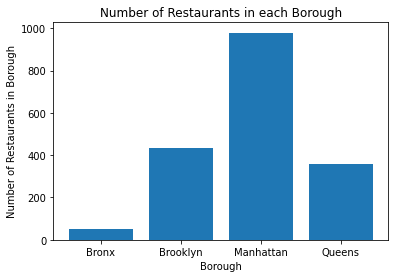

In [ ]:
results_df_2=results_df.groupby(['Borough']).count()
results_df_2 = results_df_2.reset_index()
plt.bar(results_df_2["Borough"], results_df_2["Restaurant_Inspection_Id"])
plt.xlabel("Borough")
plt.ylabel("Number of Restaurants in Borough")
plt.title("Number of Restaurants in each Borough")

Text(0.5, 1.0, 'Number of Compliant Restaurants in each Borough')

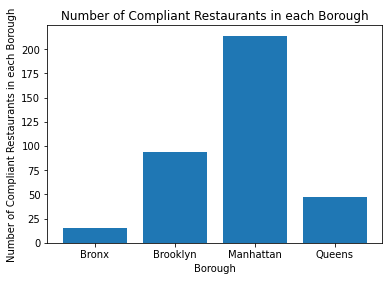

In [ ]:
#Compliant Restaurants in each Borough
results_df_3= results_df[results_df['Is_Roadway_Compliant'] == 'Compliant']
results_df_3=results_df_3.groupby(['Borough'])['Is_Roadway_Compliant'].count()
results_df_3 = results_df_3.reset_index()
plt.bar(results_df_3['Borough'], results_df_3['Is_Roadway_Compliant'])
plt.xlabel("Borough")
plt.ylabel("Number of Compliant Restaurants in each Borough")
plt.title("Number of Compliant Restaurants in each Borough")

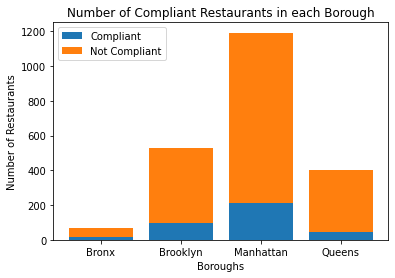

In [ ]:
results_df_3= results_df[results_df['Is_Roadway_Compliant'] == 'Compliant']
results_df_3=results_df_3.groupby(['Borough'])['Is_Roadway_Compliant'].count()
results_df_3 = results_df_3.reset_index()
plt.bar(results_df_3['Borough'], results_df_2["Restaurant_Inspection_Id"] )
plt.bar(results_df_3['Borough'], results_df_2["Restaurant_Inspection_Id"], bottom=results_df_3['Is_Roadway_Compliant'])
plt.xlabel("Boroughs")
plt.ylabel("Number of Restaurants")
plt.title("Number of Compliant Restaurants in each Borough")
abc=["Compliant", "Not Compliant"]
plt.legend(abc,loc=2)


In [ ]:
#Count of Restaurants inspected every year
#results_df_4['year']=results_df['Inspected_On'].apply(lambda x:x.split('-')[0])
results_df['year'] = pd.to_datetime(results_df['Inspected_On']).dt.date


Text(0.5, 1.0, 'Number of Restaurants in each Council District')

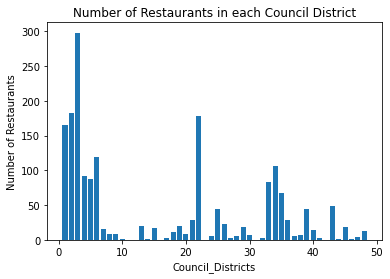

In [ ]:
results_df_4=results_df.groupby(['Council_District']).count()
results_df_4 = results_df_4.reset_index()
plt.bar(results_df_4["Council_District"], results_df_4["Restaurant_Inspection_Id"])
plt.xlabel("Council_Districts")
plt.ylabel("Number of Restaurants")
plt.title("Number of Restaurants in each Council District")

Text(0.5, 1.0, 'Number of Compliant Restaurants in each Council District')

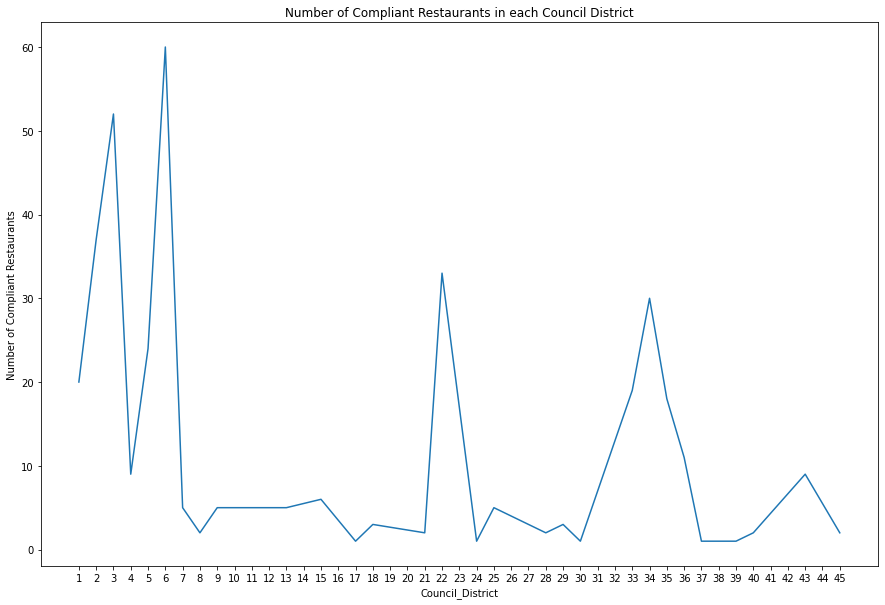

In [ ]:
#Compliant Restaurants in each Council District
plt.figure(figsize=(15,10))
results_df_4= results_df[results_df['Is_Roadway_Compliant'] == 'Compliant']
#results_df_4=results_df_4.groupby(['Council_District])['Is_Roadway_Compliant'].count()
results_df_4=results_df_4.groupby(['Council_District'])['Is_Roadway_Compliant'].count()
results_df_4 = results_df_4.reset_index()
plt.plot(results_df_4['Council_District'], results_df_4['Is_Roadway_Compliant'])
highest_cd=int(max(results_df_4['Council_District']))+1
plt.xticks([i for i in range(1, highest_cd)])
plt.xlabel("Council_District")
plt.ylabel("Number of Compliant Restaurants")
plt.title("Number of Compliant Restaurants in each Council District")


Text(0.5, 1.0, 'Number of Compliant Restaurants By Choice of Seating')

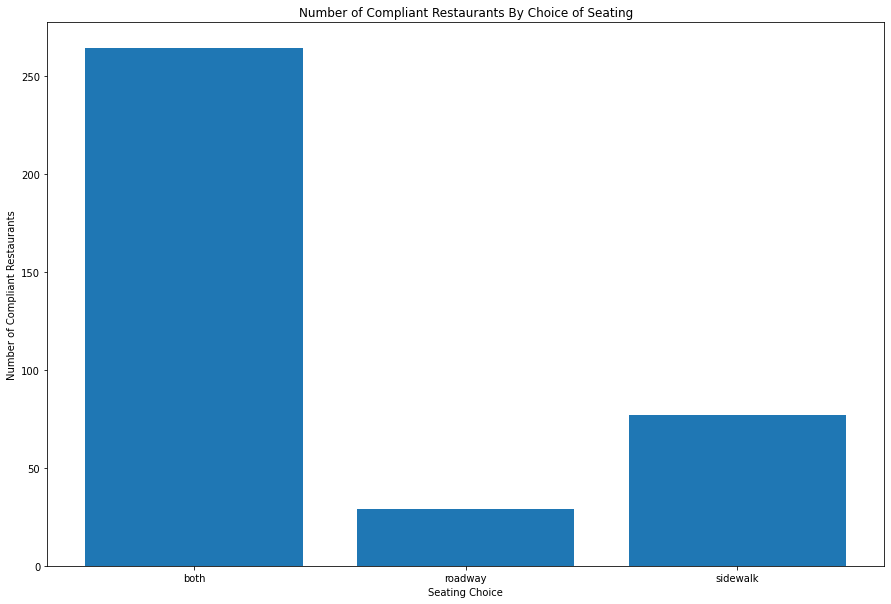

In [ ]:
#Compliant Restaurants in each Council District
plt.figure(figsize=(15,10))
results_df_5= results_df[results_df['Is_Roadway_Compliant'] == 'Compliant']
results_df_5=results_df_5.groupby(['Seating_Choice'])['Is_Roadway_Compliant'].count()
results_df_5 = results_df_5.reset_index()
plt.bar(results_df_5['Seating_Choice'], results_df_5['Is_Roadway_Compliant'])
#plt.xticks([i for i in range(1, highest_cd)])
plt.xlabel("Seating Choice")
plt.ylabel("Number of Compliant Restaurants")
plt.title("Number of Compliant Restaurants By Choice of Seating")



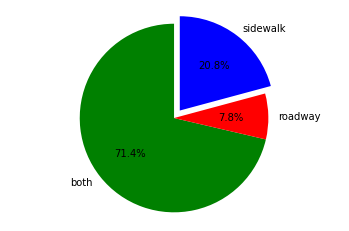

In [ ]:
labels= list(results_df_5['Seating_Choice'])

colors=['green', 'red', 'blue']

sizes= list(results_df_5['Is_Roadway_Compliant'])

explode = (0, 0, 0.1)

plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', explode=explode)

plt.axis('equal')

plt.show()

In [ ]:
Reference:
https://medium.com/nerd-for-tech/10-step-eda-getting-started-with-your-data-science-project-for-beginners-ae9e2a3a43ba
https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
https://dev.socrata.com/foundry/data.cityofnewyork.us/4dx7-axux
https://stackoverflow.com/questions/35595710/splitting-timestamp-column-into-separate-date-and-time-columns

SyntaxError: ignored

Map Visualization

NameError: ignored